In [1]:
#using Pkg
using Plots
using DelimitedFiles
using Dierckx
include("../src/MurcaNoneqNumerical.jl")
using .MurcaNoneqNumerical
include("../src/MurcaReductionFit.jl")
using .MurcaReductionFit
include("../src/MurcaNoneqZeroTemp.jl")
using .MurcaNoneqZeroTemp

In [2]:
pyplot()

Plots.PyPlotBackend()

# Check quality of numerical integration

In [3]:
function HM(xi::Float64)::Float64
    return (14680.0*xi)/(11513.0*pi^2) + (7560.0*xi^3)/(11513.0*pi^4) + (840*xi^5)/(11513.0*pi^6) + (24.0*xi^7)/(11513.0*pi^8)
end

HM (generic function with 1 method)

In [4]:
xis = exp10.(-1:0.25:2)
Ips_nonSF = Ip_SFnp.(0., 0., xis, 10)

13-element Array{Array{Float64,1},1}:
 [0.00249649, 0.0931498]
 [0.0156495, 0.519623]  
 [0.0402131, 0.969124]  
 [0.0738525, 1.06173]   
 [0.13601, 1.19889]     
 [0.269022, 1.66464]    
 [0.645744, 3.47894]    
 [2.33545, 13.116]      
 [22.4045, 153.45]      
 [414.011, 4637.25]     
 [5014.24, 75354.0]     
 [1.0955e5, 1.01765e6]  
 [5.8453e6, 8.058e7]    

In [5]:
xis = exp10.(-1:0.25:2)
#Ips_nonSF = Ip_SFnp.(0., 0., xis, 5, 0.01)

13-element Array{Float64,1}:
   0.1                
   0.17782794100389226
   0.31622776601683794
   0.5623413251903491 
   1.0                
   1.7782794100389228 
   3.162277660168379  
   5.623413251903491  
  10.0                
  17.78279410038923   
  31.622776601683793  
  56.23413251903491   
 100.0                

In [6]:
Ips_nonSF_zeroT = Ip_rate_SFnp_trp.(1e-4, 1e-4, xis)

13-element Array{Float64,1}:
      2.195199978223546e-14 
      1.2349303513280365e-12
      6.945471370830508e-11 
      3.905911551401771e-9  
      2.1964897517129997e-7 
      1.235182645997719e-5  
      0.0006945955855019793 
      0.03906002547299676   
      2.196506708543981     
    123.51852497726914      
   6945.947519155541        
 390598.8547686101          
      2.19649682638502e7    

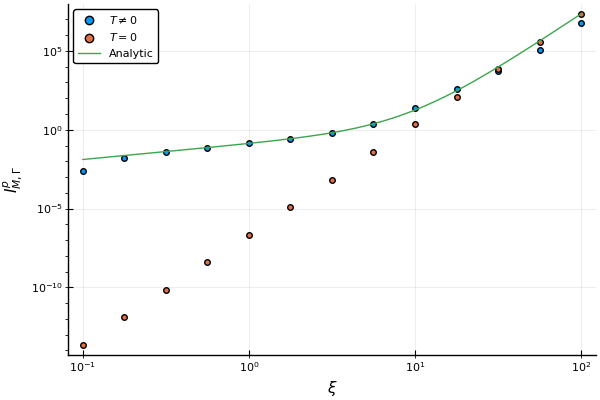

In [7]:
scatter(xis, map(x->x[1], Ips_nonSF), scale=:log10, label="\$ T\\neq 0 \$")
scatter!(xis, Ips_nonSF_zeroT, label="\$ T=0 \$")
plot!(0.1:0.1:100, HM.(0.1:0.1:100), label="Analytic")
xlabel!("\$ \\xi \$")
ylabel!("\$ I_{M, \\Gamma}^p \$")

Eaxct numerical integration is good only for $\xi \lesssim 10$

Higher order Gauss-Laguerre qudrature ($ n >5$) may improve large $\xi$ region.

In [17]:
xi = 15.
vn = 0.3
vp = 0.3
@time @show Ip_SFnp(vn, vp, xi, 5) / HM(xi)
@time @show Ip_rate_SFnp_trp(vn, vp, xi) / HM(xi)

Ip_SFnp(vn, vp, xi, 5) / HM(xi) = [0.65219, 2.90105]
  0.053190 seconds (225.11 k allocations: 18.889 MiB, 14.41% gc time)
Ip_rate_SFnp_trp(vn, vp, xi) / HM(xi) = 0.27889416107854503
  0.487172 seconds (216 allocations: 12.125 KiB)


0.27889416107854503

This shows even above the threshold, it makes difference

In [8]:
xis = exp10.(-1:0.25:2)
Ins_nonSF = In_SFnp.(0., 0., xis, 10)

13-element Array{Array{Float64,1},1}:
 [0.00249649, 0.0931498]
 [0.0156495, 0.519623]  
 [0.0402131, 0.969124]  
 [0.0738525, 1.06173]   
 [0.13601, 1.19889]     
 [0.269022, 1.66464]    
 [0.645744, 3.47894]    
 [2.33545, 13.116]      
 [22.4045, 153.45]      
 [414.011, 4637.25]     
 [5014.24, 75354.0]     
 [1.0955e5, 1.01765e6]  
 [5.8453e6, 8.058e7]    

In [9]:
Ins_nonSF_zeroT = In_rate_SFnp_trp.(1e-4, 1e-4, xis)

13-element Array{Float64,1}:
      2.194738205749851e-14 
      1.2348383672726872e-12
      6.945288188667945e-11 
      3.9058755293039506e-9 
      2.1964837748557368e-7 
      1.2351819013467568e-5 
      0.0006945952826430848 
      0.03906001077803799   
      2.196506950758852     
    123.51859632853244      
   6945.952534553371        
 390599.0971410877          
      2.1964977983107183e7  

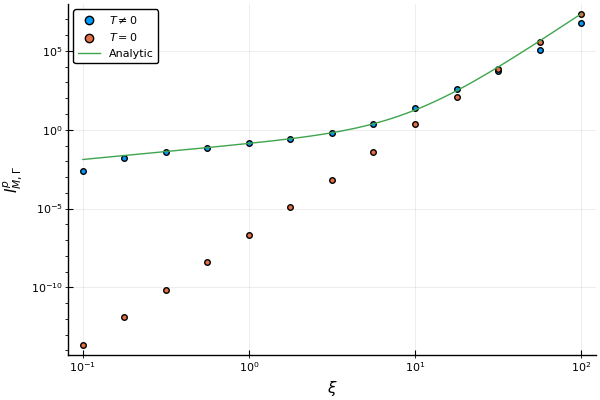

In [10]:
scatter(xis, map(x->x[1], Ins_nonSF), scale=:log10, label="\$ T\\neq 0 \$")
scatter!(xis, Ins_nonSF_zeroT, label="\$ T=0 \$")
plot!(0.1:0.1:100, HM.(0.1:0.1:100), label="Analytic")
xlabel!("\$ \\xi \$")
ylabel!("\$ I_{M, \\Gamma}^p \$")

In [18]:
xi = 15.
vn = 0.3
vp = 0.3
@time @show In_SFnp(vn, vp, xi, 5) / HM(xi)
@time @show In_rate_SFnp_trp(vn, vp, xi) / HM(xi)

In_SFnp(vn, vp, xi, 5) / HM(xi) = [0.648088, 2.9252]
  0.155588 seconds (675.14 k allocations: 56.656 MiB, 12.49% gc time)
In_rate_SFnp_trp(vn, vp, xi) / HM(xi) = 0.26879698071664965
  5.365936 seconds (244 allocations: 14.156 KiB)


0.26879698071664965